## Investment Portfolio Analysis

### Exploratory Analysis Part 1 

In [4]:
#Load Packages

# 1.1. Load R packages 
library("tseries")
library("quantmod")
library("Quandl")
library("PortfolioAnalytics")
library("DEoptim")

In [5]:
# 1.2. Data Reading
data <- read.csv("Investment-Portfolio-Analysis-Data.txt",header=T)
data <- xts(data[,2:30],order.by=as.Date(data[,1]))
head(data)

            mcash   mbonds  msbonds  mlbonds  mibonds  mstocks mlstocks
2007-01-31 109.00 7.160662 8.528708 6.476980 7.589386 29.04660 109.4419
2007-02-28 109.12 7.268778 8.608584 6.666734 7.758039 28.57824 107.2868
2007-03-31 109.28 7.270352 8.632868 6.591707 7.782285 28.89504 108.4799
2007-04-30 109.40 7.307607 8.673239 6.648708 7.870720 30.05387 113.2724
2007-05-31 109.58 7.250820 8.638874 6.520618 7.730698 31.16231 117.2110
2007-06-30 109.64 7.223215 8.670263 6.463231 7.689753 30.64043 115.2484
           msstocks mgstocks mvstocks mistocks mdstocks mestocks  moil mgold
2007-01-31 29.46211 17.77470 14.38522 13.79684 33.95412 19.32504 48.24 64.83
2007-02-28 29.42683 17.84074 14.30250 13.80458 34.06837 19.07677 51.18 66.48
2007-03-31 29.78501 18.16343 14.38777 14.19126 35.01281 19.86162 53.35 65.74
2007-04-30 30.57905 18.80505 14.65268 14.74808 36.38494 20.70254 51.24 67.09
2007-05-31 31.92890 19.76747 15.19077 15.20437 37.19434 21.93588 48.96 65.54
2007-06-30 31.41719 19.62594 14.80

##  Cash and Cash Equivalents

###  U.S. Total Money Market

,mcash
Annualized Return,0.0012
Annualized Std Dev,0.0034
Annualized Sharpe (Rf=0%),0.3473


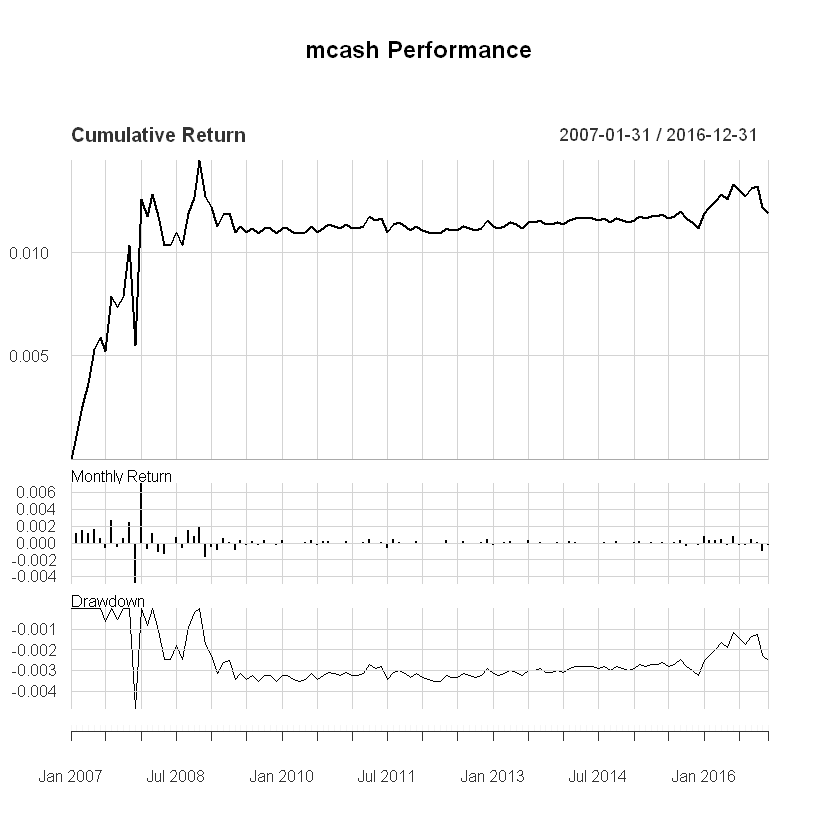

In [6]:
#  U.S. Total Money Market
cash <- data[,1]
mcash <- monthlyReturn(cash,type="arithmetic") ##create monthly return column
colnames(mcash) <- "mcash"                     ##give me mewly created column a name
table.AnnualizedReturns(mcash)
charts.PerformanceSummary(mcash)               #Create combined wealth index, period performance, and drawdown chart

### 2.2. Fixed Income and Bonds

In [7]:
# U.S. Total Bond Market
bonds <- data[,2]
mbonds <- monthlyReturn(bonds,type="arithmetic")       ##create monthly return column
colnames(mbonds) <- "mbonds"

# U.S. Short Term Bond Market 
sbonds <- data[,3]
msbonds <- monthlyReturn(sbonds,type="arithmetic")     ##create monthly return column
colnames(msbonds) <- "msbonds"

# U.S. Long Term Bond Market 
lbonds <- data[,4]
mlbonds <- monthlyReturn(lbonds,type="arithmetic")    ##create monthly return column
colnames(mlbonds) <- "mlbonds"

# International Total Bond Market 
ibonds <- data[,5]
mibonds <- monthlyReturn(ibonds,type="arithmetic")    ##create monthly return column
colnames(mibonds) <- "mibonds"

,mcash,msbonds,mbonds,mlbonds
Annualized Return,0.0012,0.0224,0.0405,0.0613
Annualized Std Dev,0.0034,0.0165,0.0343,0.1226
Annualized Sharpe (Rf=0%),0.3473,1.3528,1.1794,0.5000


,mbonds,mibonds
Annualized Return,0.0405,0.0271
Annualized Std Dev,0.0343,0.0840
Annualized Sharpe (Rf=0%),1.1794,0.3232


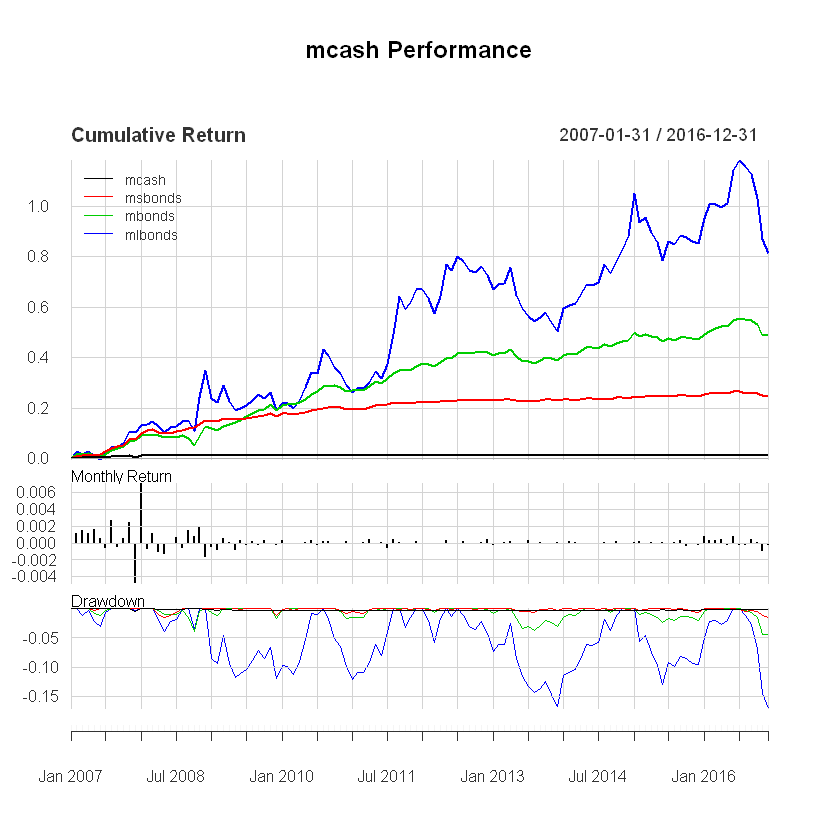

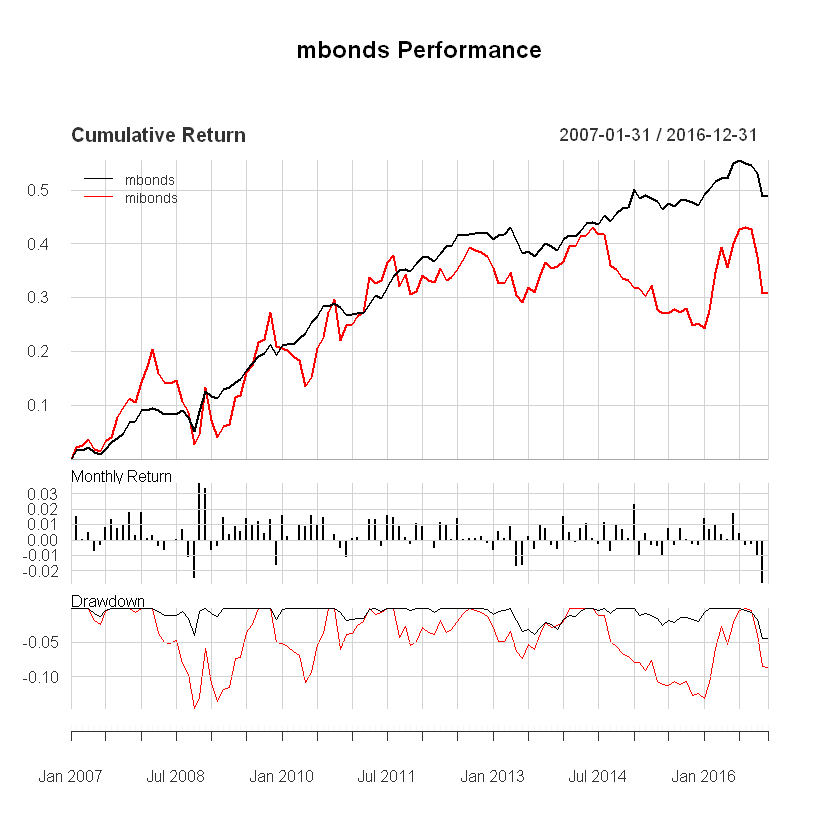

In [8]:
# U.S. Cash, Cash Equivalents and Fixed Income or Bond Markets Returns Comparison 
usbondscomp <- cbind(mcash,msbonds,mbonds,mlbonds)
table.AnnualizedReturns(usbondscomp)
charts.PerformanceSummary(usbondscomp)

# U.S. and International Total Bond Markets Returns Comparison 
bondscomp <- cbind(mbonds,mibonds)
table.AnnualizedReturns(bondscomp)
charts.PerformanceSummary(bondscomp)

### 2.3. Equities or Stocks

,mstocks,mistocks
Annualized Return,0.0680,0.0066
Annualized Std Dev,0.1578,0.1940
Annualized Sharpe (Rf=0%),0.4307,0.0338


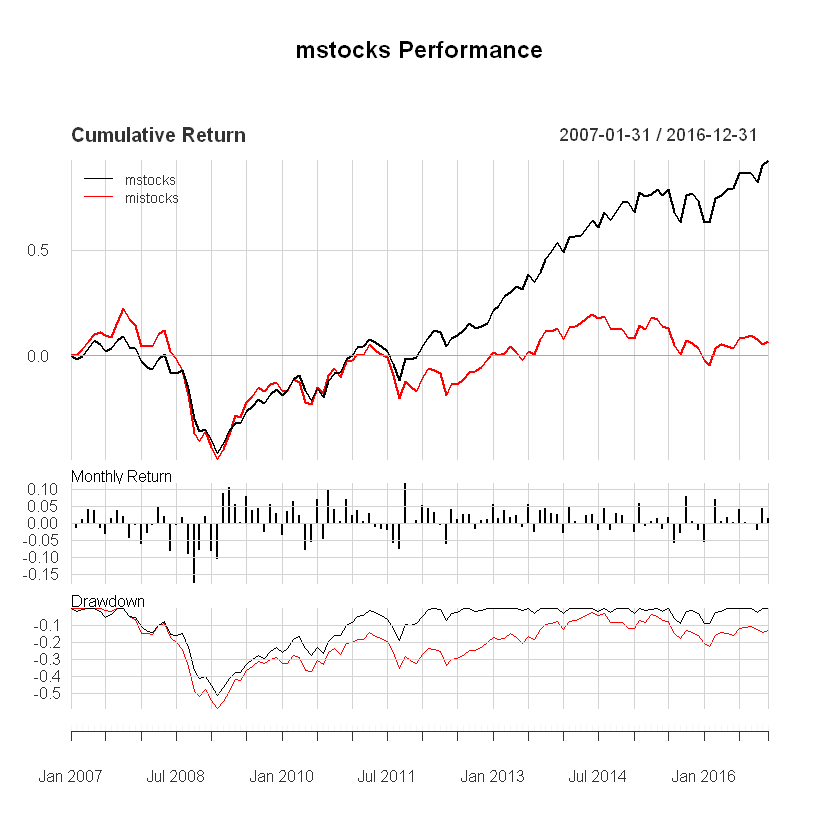

In [10]:
# U.S. Total Stock Market
stocks <- data[,6]
mstocks <- monthlyReturn(stocks,type="arithmetic")   ##create monthly return column
colnames(mstocks) <- "mstocks"

# U.S. Large Cap Stock Market
lstocks <- data[,7]
mlstocks <- monthlyReturn(lstocks,type="arithmetic")    ##create monthly return column
colnames(mlstocks) <- "mlstocks"

# U.S. Small Cap Stock Market 
sstocks <- data[,8]
msstocks <- monthlyReturn(sstocks,type="arithmetic")    ##create monthly return column
colnames(msstocks) <- "msstocks"

#  U.S. Small Cap Growth Stock Market
gstocks <- data[,9]
mgstocks <- monthlyReturn(gstocks,type="arithmetic")    ##create monthly return column
colnames(mgstocks) <- "mgstocks"

# U.S. Small Cap Value Stock Market 
vstocks <- data[,10]
mvstocks <- monthlyReturn(vstocks,type="arithmetic")    ##create monthly return column
colnames(mvstocks) <- "mvstocks"

# International Total Stock Market
istocks <- data[,11]
mistocks <- monthlyReturn(istocks,type="arithmetic")     ##create monthly return column
colnames(mistocks) <- "mistocks"

#  International Developed Stock Market 
dstocks <- data[,12]
mdstocks <- monthlyReturn(dstocks,type="arithmetic")    ##create monthly return column
colnames(mdstocks) <- "mdstocks"

# International Emerging Stock Market 
estocks <- data[,13]
mestocks <- monthlyReturn(estocks,type="arithmetic")    ##create monthly return column
colnames(mestocks) <- "mestocks"

# U.S. and International Total Stock Markets Returns Comparison 
stockscomp <- cbind(mstocks, mistocks)
table.AnnualizedReturns(stockscomp)
charts.PerformanceSummary(stockscomp)

,mlstocks,mstocks,msstocks
Annualized Return,0.0656,0.0680,0.0768
Annualized Std Dev,0.1528,0.1578,0.1984
Annualized Sharpe (Rf=0%),0.4293,0.4307,0.3871


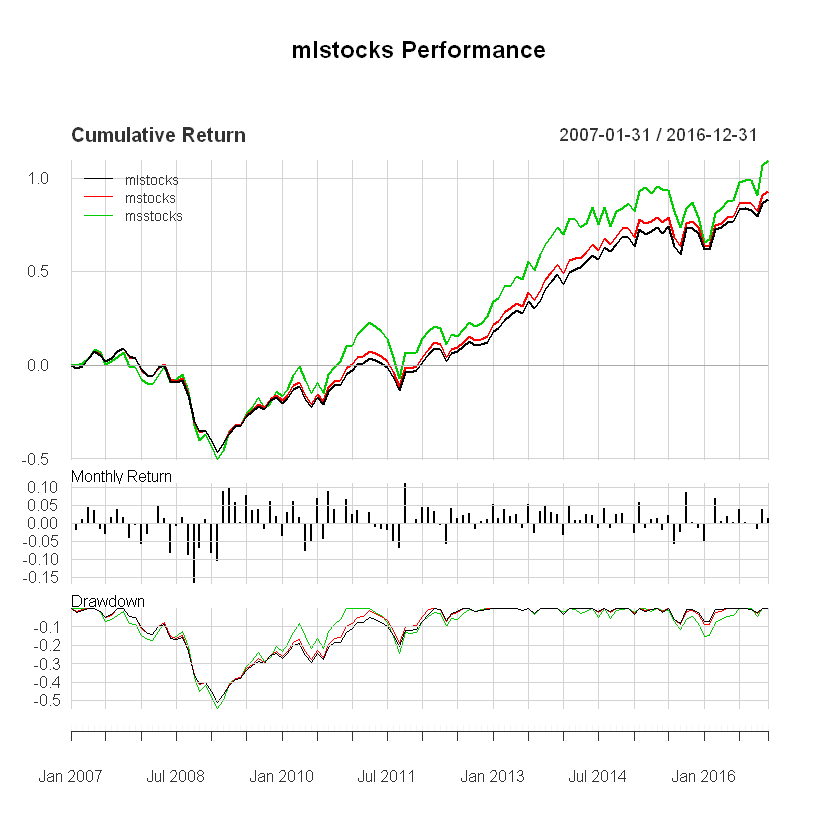

In [11]:
# U.S. Market Cap Stock Markets Returns Comparison 
sizecomp <- cbind(mlstocks,mstocks,msstocks)
table.AnnualizedReturns(sizecomp)
charts.PerformanceSummary(sizecomp)

,msstocks,mvstocks,mgstocks
Annualized Return,0.0768,0.0726,0.0773
Annualized Std Dev,0.1984,0.2000,0.2023
Annualized Sharpe (Rf=0%),0.3871,0.3631,0.3822


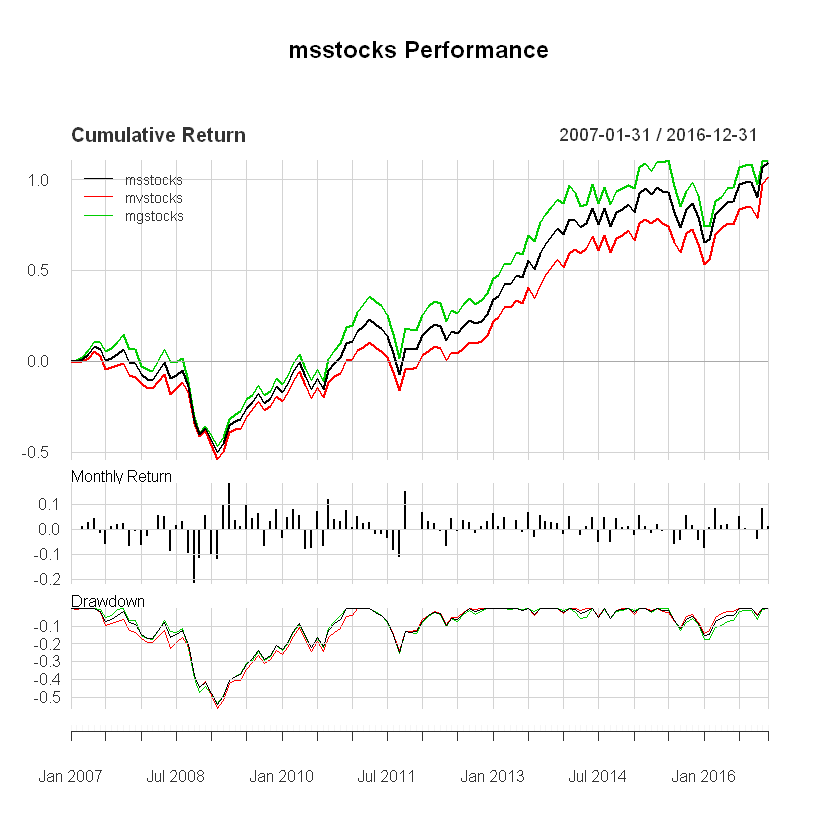

In [12]:
#  U.S. Investment Style Stock Markets Returns Comparison 
stylecomp <- cbind(msstocks,mvstocks,mgstocks)
table.AnnualizedReturns(stylecomp)
charts.PerformanceSummary(stylecomp)

### 2.4. Commodities

,moil,mgold,mreit,musd
Annualized Return,-0.1319,0.0539,-0.0171,0.0059
Annualized Std Dev,0.3312,0.1935,0.2422,0.0873
Annualized Sharpe (Rf=0%),-0.3984,0.2787,-0.0705,0.0679


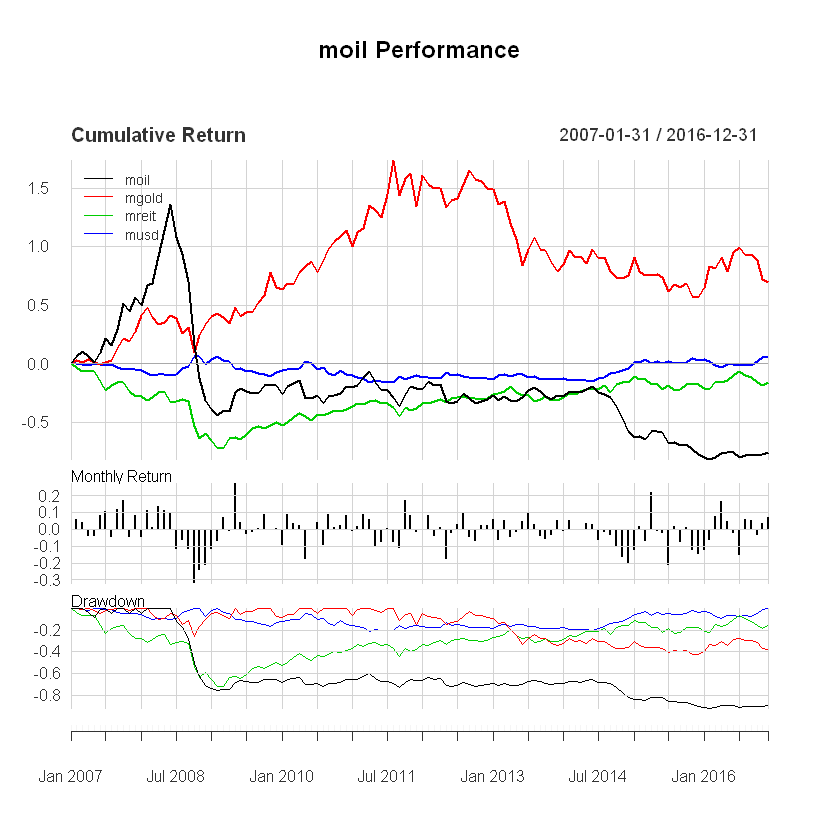

In [13]:
#  United States Oil Fund
oil <- data[,14]
moil <- monthlyReturn(oil,type="arithmetic")
colnames(moil) <- "moil"

# U.S. Real Estate Investment Trust
reit <- data[,16]
mreit <- monthlyReturn(reit,type="arithmetic")     #REIT shouldn't be here, but it is
colnames(mreit) <- "mreit"


# USD Major Currencies Index 
usd <- data[,17]
musd <- monthlyReturn(usd,type="arithmetic")   #Currency shouldn't be here, but it is
colnames(musd) <- "musd"


#  Gold Shares
gold <- data[,15]
mgold <- monthlyReturn(gold,type="arithmetic")
colnames(mgold) <- "mgold"

#  Commodities Returns Comparison 
commcomp <- cbind(moil,mgold,mreit,musd)
table.AnnualizedReturns(commcomp)
charts.PerformanceSummary(commcomp)

### 2.7. Main Asset Classes Comparison

,mbonds,mstocks,moil,mgold,mreit,musd
Annualized Return,0.0405,0.0680,-0.1319,0.0539,-0.0171,0.0059
Annualized Std Dev,0.0343,0.1578,0.3312,0.1935,0.2422,0.0873
Annualized Sharpe (Rf=0%),1.1794,0.4307,-0.3984,0.2787,-0.0705,0.0679


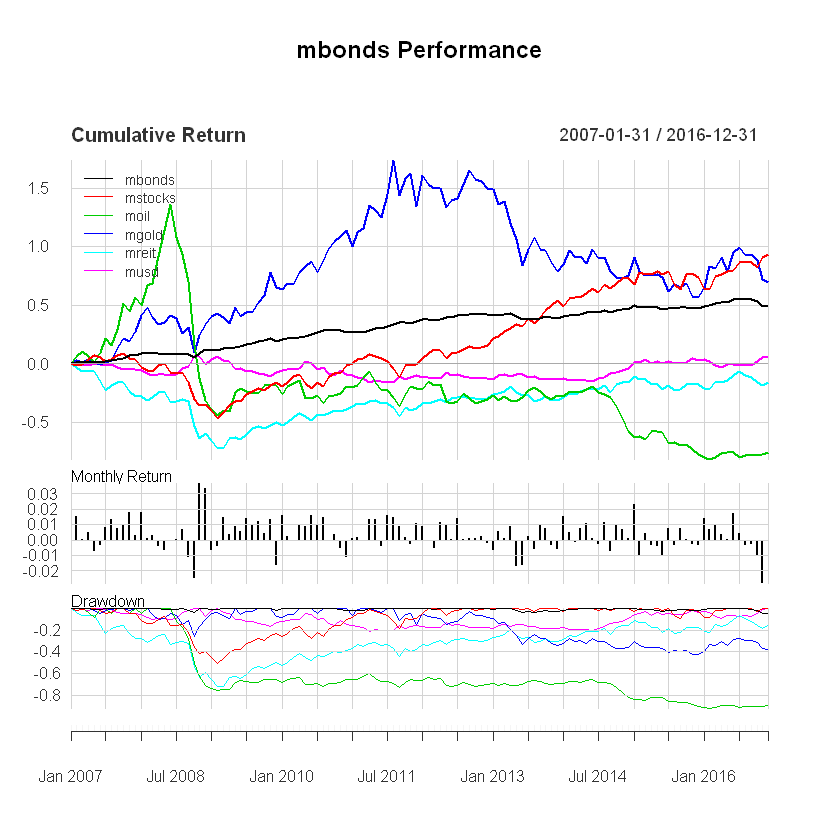

In [14]:
# 2.7. Main Asset Classes Comparison
assetscomp <- cbind(mbonds,mstocks,moil,mgold,mreit,musd)
table.AnnualizedReturns(assetscomp)
charts.PerformanceSummary(assetscomp)

## 3. Returns and Risks
## U.S. Large Cap Stock Market
## (Market: U.S. Total Stock Market, Risk Free Rate: U.S. 1 Month Treasury Bills)

### 3.1. Expected Returns
### 3.2. Risk

mmean,mmed
0.006288917,0.01091934


msd,mmad
0.04409787,0.0331431


msd,mmad,mvmean
0.04409787,0.0331431,0.06025781


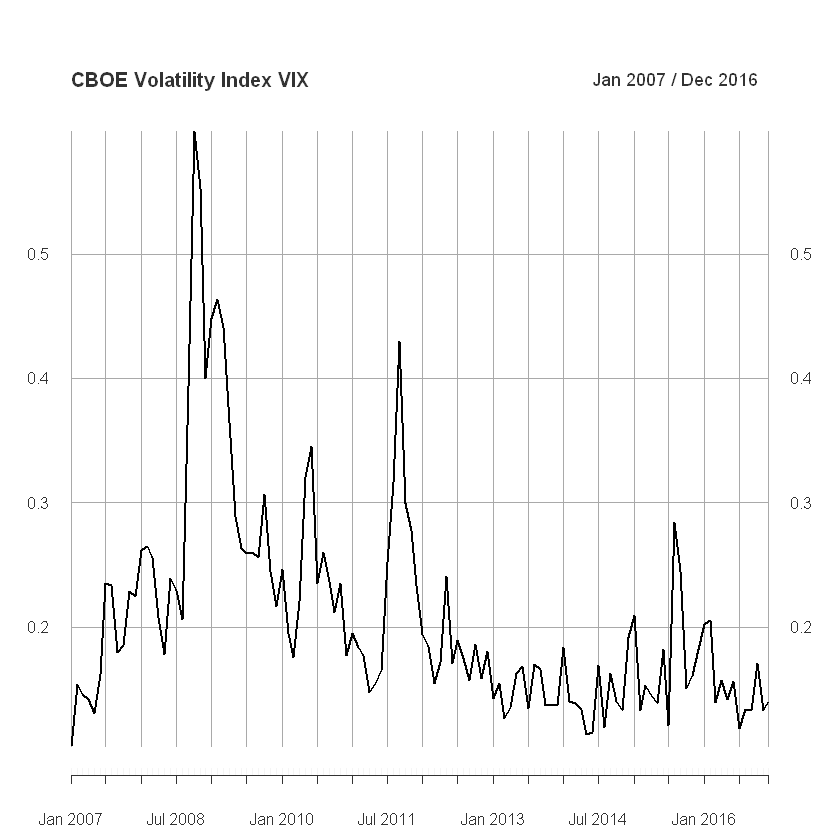

In [16]:
#  Mean
mmean <- mean(mlstocks)

# Median
mmed <- median(mlstocks)

# Expected Returns First Comparison
mretcomp1 <- cbind(mmean,mmed)
mretcomp1

#  Risk Metrics

#  Standard Deviation
msd <- sd(mlstocks)

# Mean Absolute Deviation
mmad <- MeanAbsoluteDeviation(mlstocks)

#  Risk Metrics First Comparison
mriskcomp1 <- cbind(msd,mmad)
mriskcomp1

#  Implied Volatility 
# CBOE VIX Index
vix <- data[,18]
mvix <- to.monthly(vix)
mvixa = mvix[,4]/100                #4 decimal places and divided by 100 to take it out of percentage
plot(mvixa,main="CBOE Volatility Index VIX")
mvix = mvixa / sqrt(12)             #12 because of monthly data
mvmean <- mean(mvix)

#  Risk Metrics Second Comparison
mriskcomp2 <- cbind(msd,mmad,mvmean)
mriskcomp2

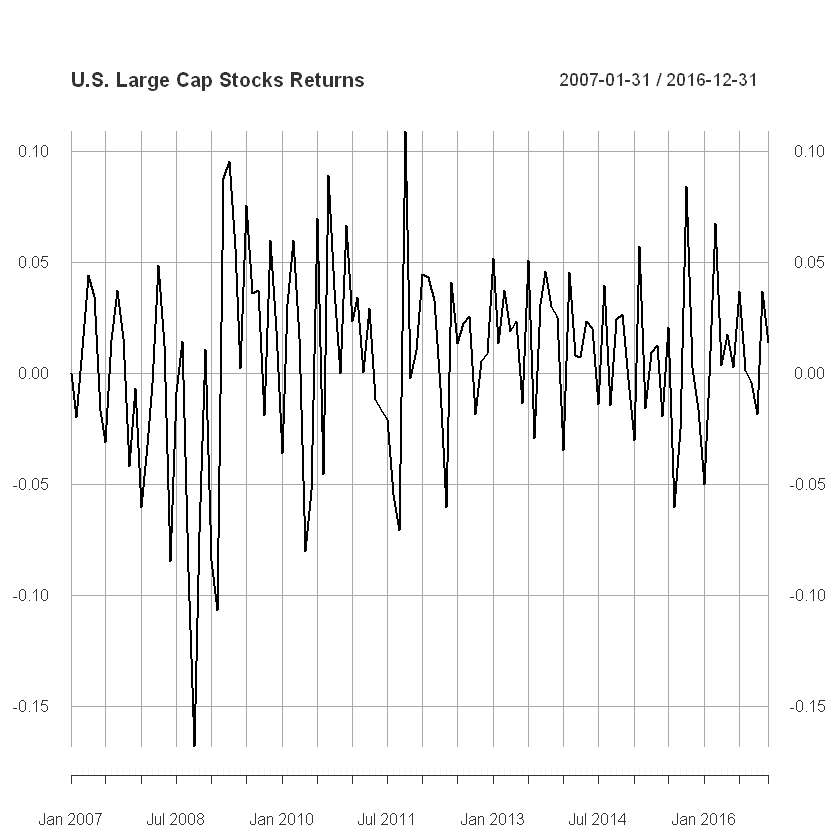

mmean,mmed,mgmean
0.006288917,0.01091934,0.005323147


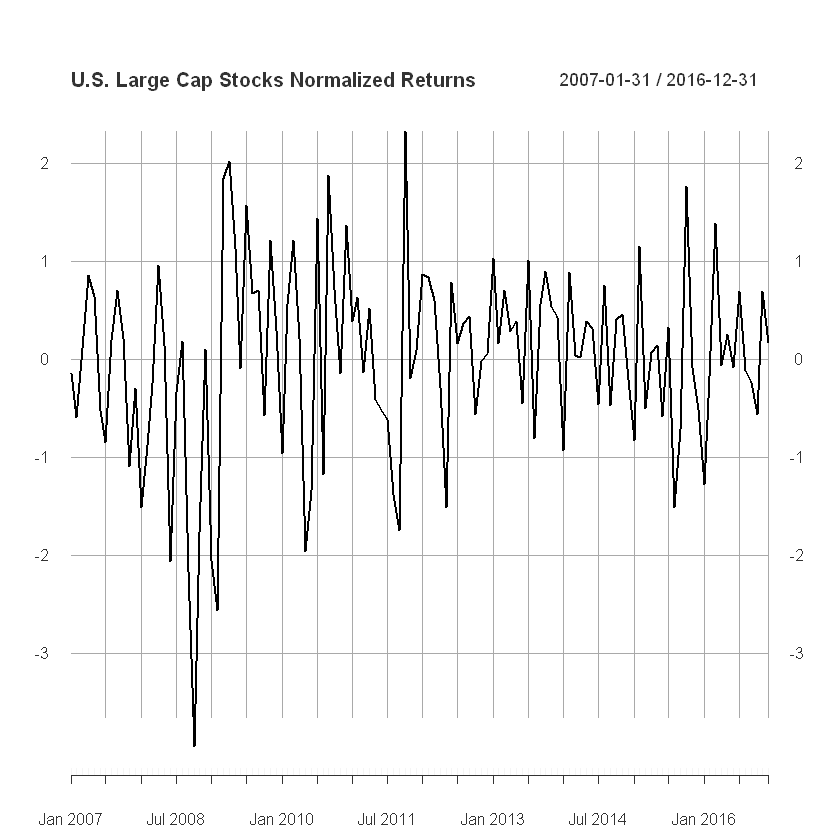

In [18]:
#  Normalized Return
plot(mlstocks,main="U.S. Large Cap Stocks Returns")
nlstocks <- (mlstocks-mean(mlstocks))/sd(mlstocks)     #normalising the return
plot(nlstocks,main="U.S. Large Cap Stocks Normalized Returns")

# Geometric Expected Return
mgmean <- exp(log(1+mmean)-(msd^2/(2*(1+mmean)^2)))-1

#  Expected Returns Second Comparison
mretcomp2 <- cbind(mmean,mmed,mgmean)
mretcomp2

### 3.3. Returns Normality

In [19]:
# Skewness
mskew <- skewness(mlstocks)
mskew

# Kurtosis
mkurt <- kurtosis(mlstocks)
mkurt

# Jarque-Bera Test      
mjb <- jarque.bera.test(mlstocks)
mjb

# Value at Risk
mvar <- VaR(mlstocks,p=0.99,method="modified")
colnames(mvar) <- c("mvar")
mvar

[1] -0.683277

[1] 1.458151


	Jarque Bera Test

data:  mlstocks
X-squared = 19.968, df = 2, p-value = 4.612e-05


,mvar
VaR,-0.1251875


### 3.4. Returns and Risks Relationships

In [20]:
#  Covariance
mmain <- data.frame(mcash,mbonds,mstocks)
macov <- cov(mmain)
macov

mstocksc <- data.frame(mlstocks,mstocks)
mscov <- cov(mstocksc)
mscov

#  Correlation
macor <- cor(mmain)
macor
mscor <- cor(mstocksc) 
mscor


# Coefficient of Determination
mar2 <- macor ^ 2
mar2
msr2 <- mscor ^ 2
msr2

,mcash,mbonds,mstocks
mcash,9.721892e-07,1.882194e-06,-8.807050e-06
mbonds,1.882194e-06,9.823867e-05,-7.424294e-06
mstocks,-8.807050e-06,-7.424294e-06,2.074445e-03


,mlstocks,mstocks
mlstocks,0.001944622,0.002002759
mstocks,0.002002759,0.002074445


,mcash,mbonds,mstocks
mcash,1.0000000,0.1925962,-0.1961120
mbonds,0.1925962,1.0000000,-0.0164461
mstocks,-0.1961120,-0.0164461,1.0000000


,mlstocks,mstocks
mlstocks,1.0000000,0.9971491
mstocks,0.9971491,1.0000000


,mcash,mbonds,mstocks
mcash,1.00000000,0.0370933096,0.0384599155
mbonds,0.03709331,1.0000000000,0.0002704743
mstocks,0.03845992,0.0002704743,1.0000000000


,mlstocks,mstocks
mlstocks,1.0000000,0.9943064
mstocks,0.9943064,1.0000000
